#Vanilla Network
 12424 total parameters(<15000) no Batch normalization or any improvements were used, trained with   Batch size  of 32 with adam optimizer for 75 epochs which took around 32 seconds for each epoch summing up to 40 minutes. 
 
 1. As the batch size increased the time for each epoch reduced gradually and also the accuracy decreased drastically.
 
 2. And there is a pattern repeated in the logs. The accuracy increases to some threshold and then drops and the cycle repeats for  higher batch sizes
 
          BatchSize    Accuracy   Time per epoch(avg)
 
              32           99.92       9s
               
              

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


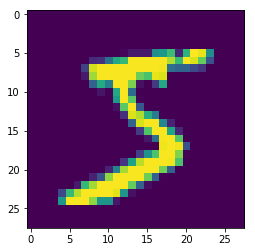

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1), border_mode='same'))
model.add(Convolution2D(16, 3, 3, activation='relu')) #26

model.add(MaxPooling2D(pool_size=(2,2)))#13

model.add(Convolution2D(32, 3, 3, activation='relu'))#11

model.add(MaxPooling2D(pool_size=(2,2)))#5


model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 10)          330       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          2510      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:

model.fit(X_train, Y_train, batch_size=32, nb_epoch=30)



Epoch 1/30
  832/60000 [..............................] - ETA: 12s - loss: 0.0061 - acc: 0.9988    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 10s 163us/step - loss: 0.0037 - acc: 0.9990
Epoch 2/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.0053 - acc: 0.9985
Epoch 3/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.0041 - acc: 0.9990
Epoch 4/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.0043 - acc: 0.9989
Epoch 5/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.0037 - acc: 0.9989
Epoch 6/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.0039 - acc: 0.9989
Epoch 7/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.0046 - acc: 0.9988
Epoch 8/30
60000/60000 [==============================] - 9s 157us/step - loss: 0.0039 - acc: 0.9989
Epoch 9/30
60000/60000 [==============================] - 10s 163us/step - loss: 0.0032 - acc: 0.9990
Epoch 10/30
60000/60000 [==============================] - 9s 156us/step - loss: 0.0039 - acc: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.09135195714950319, 0.9904]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 4.8002920e-36 7.1921865e-31 1.5128478e-30 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4555625e-31]
 [9.5057982e-33 1.0712395e-24 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 6.4301246e-27 0.0000000e+00 8.9922426e-36 0.0000000e+00]
 [1.1000081e-23 1.0000000e+00 1.7446989e-18 4.7092812e-27 9.4989568e-16
  9.9305601e-21 8.5069837e-24 3.5159570e-17 8.5624634e-16 5.9818316e-30]
 [1.0000000e+00 0.0000000e+00 4.4211711e-37 0.0000000e+00 0.0000000e+00
  1.1560747e-31 1.9529425e-17 0.0000000e+00 7.8399048e-23 5.7325727e-26]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6323289e-33]
 [1.2998194e-24 1.0000000e+00 4.2118492e-20 1.0999001e-36 2.3336295e-20
  1.5213733e-29 6.0089240e-33 1.7878121e-17 1.1167529e-20 6.2896286e-29]
 [0.0000000e+00 1.9219931e-29 1.8273370e-37 0.0000000e+00 1.0000000e+00
  3.0134055e-27 0.0000000e+00 4.1922219e-31 1.3142141e-23 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7fc7df8ad860>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fc7e0128278>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fc7e0128438>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fc7e0128780>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fc7e0128940>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7fc7df8f0f98>,
 'flatten_1': <keras.layers.core.Flatten at 0x7fc7df914a20>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7fc7e013af28>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7fc7df8f0e48>}

conv2d_1


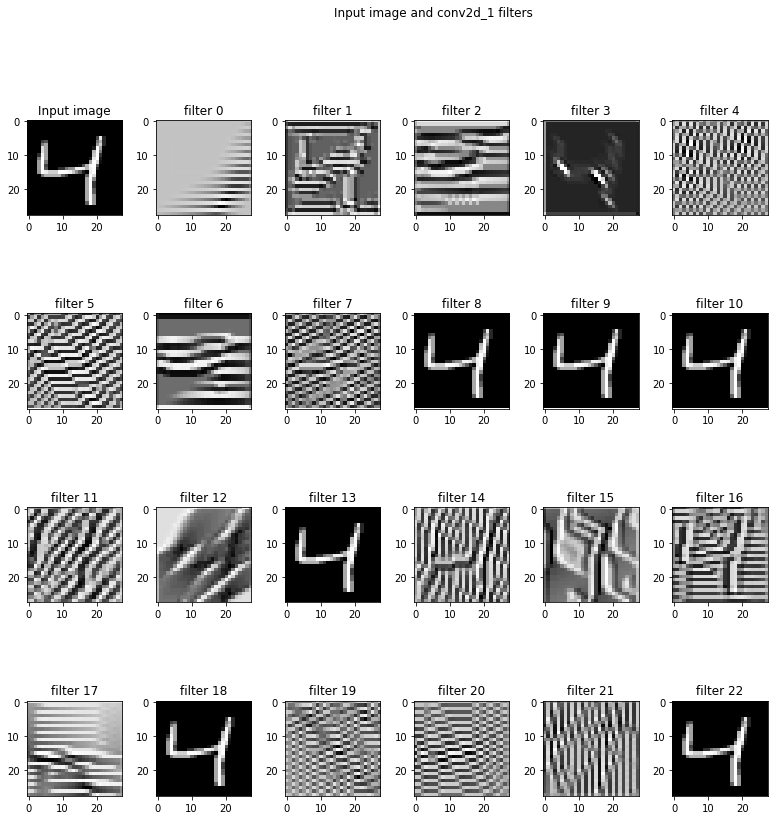

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    print(layer_name)
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])
        

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]
        

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
        

vis_img_in_filter()